In [1]:
#Developed a neural network for learning a function mapping using Pytorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    def __init__(self,input=2,h1=20,output=1):
        super().__init__()
        self.fc1=nn.Linear(input,h1)
        self.out=nn.Linear(h1,output)
    def forward(self,x):
        x=F.tanh(self.fc1(x))
        x=F.tanh(self.out(x))
        return x

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(0)
x= np.linspace(0, 2*np.pi, 1000).reshape(-1, 1)  
y= np.sin(x)
y2=np.cos(x)
x=(x-np.pi)/(np.pi)
x1=np.concatenate([x, y], axis=1)
y1=y2[0:1000]


In [6]:
x1=torch.FloatTensor(x1)
y1=torch.FloatTensor(y1)

In [7]:
model=Model()
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [8]:
epochs=1000
loss=[]
for i in range(epochs):
    ypred=model.forward(x1)
    loss1=criterion(ypred,y1)
    loss.append(loss1.detach().numpy())
    optimizer.zero_grad()
    loss1.backward()
    optimizer.step()


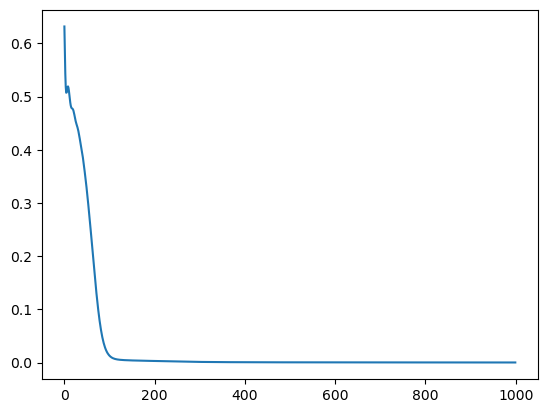

In [9]:
plt.plot(range(epochs),loss)

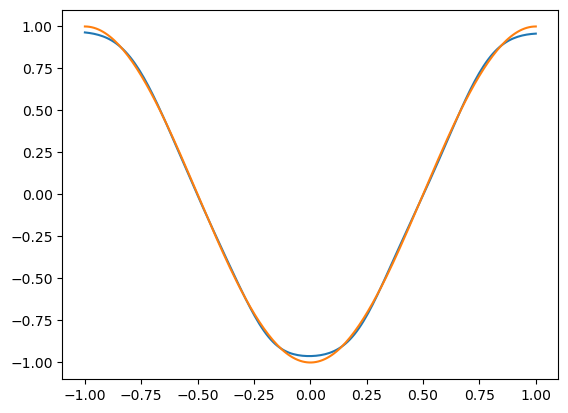

In [10]:
with torch.no_grad():
    x= np.linspace(0, 2*np.pi,200).reshape(-1, 1) 
    y1=np.sin(x)
    y2=np.cos(x)
    x=(x-np.pi)/(np.pi)
    x=torch.FloatTensor(x)
    y1=torch.FloatTensor(y1)
    input=torch.concatenate([x,y1],axis=1)
    ypred=model.forward(input)
    plt.plot(x,ypred)
    plt.plot(x,y2)